言語学フェス2025での発表「確率論的な視点から見た弛緩したソ」のグラフ描画に使用したコードたち

# ライブラリのインポート
人によるけど、Google Colaboで動かすときはこれ以外は入ってると思う。

In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=cdd6a343ffd92b623aa3e369bcd5f17b5af4d9d32b8d861cac4b5938a8aed8e6
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


# 図1. コ･ソ･アの領域

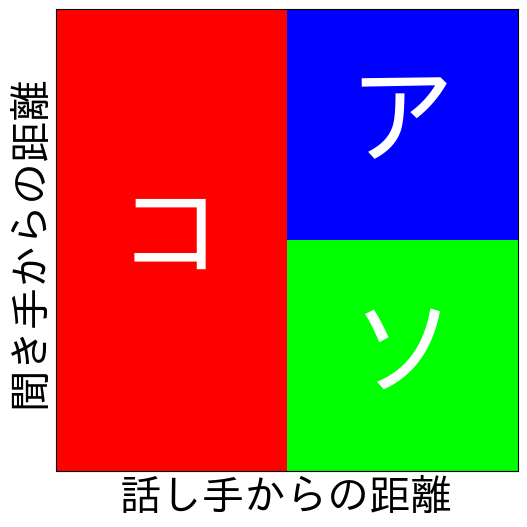

In [12]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create a grid for the square [0,1] x [0,1]
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)

# Initialize an RGB image
image = np.zeros((500, 500, 3))

# Define the colors based on the conditions
# Red region: x < 0.5
image[X < 0.5, 0] = 1  # Red channel

# Green region: 0.5 < x < 1 and y < 0.5
image[(X > 0.5) & (Y < 0.5), 1] = 1  # Green channel

# Blue region: 0.5 < x < 1 and 0.5 < y < 1
image[(X > 0.5) & (Y > 0.5), 2] = 1  # Blue channel

# Plot the image and add labels
plt.figure(figsize=(6, 6))
plt.imshow(image, extent=[0, 1, 0, 1], origin="lower")

# Add white text to the center of each region
plt.text(0.25, 0.5, "コ", color="white", fontsize=80, ha="center", va="center")  # Red region center
plt.text(0.75, 0.25, "ソ", color="white", fontsize=80, ha="center", va="center")  # Green region center
plt.text(0.75, 0.75, "ア", color="white", fontsize=80, ha="center", va="center")  # Blue region center

# Adjust labels and remove ticks
plt.xlabel("話し手からの距離", fontsize=30)
plt.ylabel("聞き手からの距離", fontsize=30)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.grid(False)
plt.show()

# 図2 コ･ソ･ソ゚･アの領域

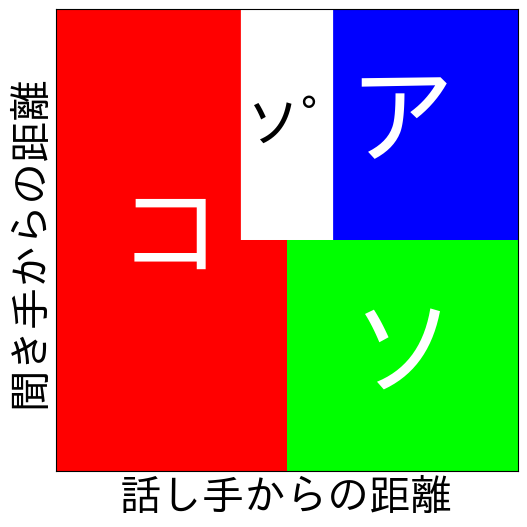

In [32]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create a grid for the square [0,1] x [0,1]
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)

# Initialize an RGB image
image = np.zeros((500, 500, 3))

# Define the colors based on the conditions
# Red region: x < 0.5
image[X < 0.5, 0] = 1  # Red channel

# Green region: 0.5 < x < 1 and y < 0.5
image[(X > 0.5) & (Y < 0.5), 1] = 1  # Green channel

# Blue region: 0.5 < x < 1 and 0.5 < y < 1
image[(X > 0.5) & (Y > 0.5), 2] = 1  # Blue channel

# Modify the image to make 0.45 < x < 0.55 and 0.5 < y < 1 white
image[(X > 0.4) & (X < 0.6) & (Y > 0.5)] = 1  # Set to white (R=1, G=1, B=1)

# Plot the modified image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, extent=[0, 1, 0, 1], origin="lower")

# Add white text to the center of each region
ax.text(0.25, 0.5, "コ", color="white", fontsize=80, ha="center", va="center")  # Red region center
ax.text(0.75, 0.25, "ソ", color="white", fontsize=80, ha="center", va="center")  # Green region center
ax.text(0.75, 0.75, "ア", color="white", fontsize=80, ha="center", va="center")  # Blue region center
ax.text(0.5, 0.75, "ソﾟ", color="black", fontsize=40, ha="center", va="center")  # TeX tilde ソ

# Remove ticks and add labels
ax.set_xlabel("話し手からの距離", fontsize=30)
ax.set_ylabel("聞き手からの距離", fontsize=30)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks

# Add arrows for x and y axes
ax.annotate("", xy=(1.05, 0), xytext=(-0.05, 0), arrowprops=dict(arrowstyle="->", color="black", lw=2))
ax.annotate("", xy=(0, 1.05), xytext=(0, -0.05), arrowprops=dict(arrowstyle="->", color="black", lw=2))

plt.show()


# 図3 コ･ソ･アの確率場

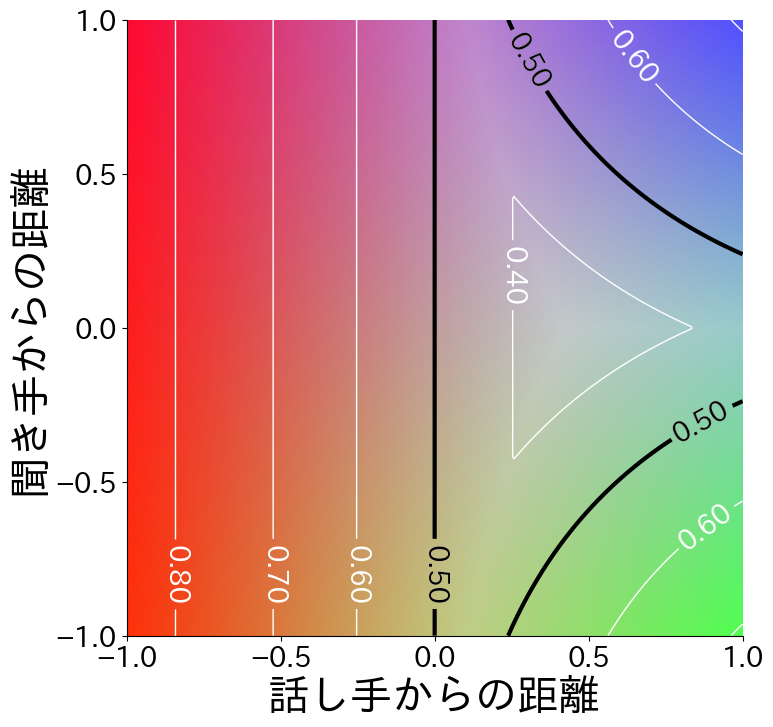

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the functions F(x), R, G, B
def F(x):
    return norm.cdf(x)

def R(x):
    return 1 - F(x)

def G(x, y):
    return F(x) * (1 - F(y))

def B(x, y):
    return F(x) * F(y)

# Define the range for x and y
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)

# Calculate z values for each function
Z_R = R(X)
Z_G = G(X, Y)
Z_B = B(X, Y)

# Find the maximum z-value at each (x, y) point
Z_max = np.maximum.reduce([Z_R, Z_G, Z_B])

# Normalize Z_max for alpha scaling (1 for max, 0 for min)
alpha_values = Z_max / Z_max.max()

# Create an RGB array for mixed colors
mixed = np.zeros((*Z_R.shape, 3))
mixed[..., 0] = Z_R / Z_R.max()  # Red channel
mixed[..., 1] = Z_G / Z_G.max()  # Green channel
mixed[..., 2] = Z_B / Z_B.max()  # Blue channel

# Create an RGBA version of the mixed color array with transparency
rgba_mixed = np.zeros((*mixed.shape[:2], 4))
rgba_mixed[..., :3] = mixed
rgba_mixed[..., 3] = alpha_values  # Set alpha based on Z_max

# Create a plot with mixed colors and contours
plt.figure(figsize=(8, 8))

# Display the mixed colors with transparency
plt.imshow(rgba_mixed, extent=[-1, 1, -1, 1], origin='lower', aspect='equal')

# Contours for all z values (white)
contours = plt.contour(X, Y, Z_max, levels=np.arange(0.1, Z_max.max() + 0.1, 0.1), colors='white', linewidths=1)

# Highlight the contour line where the maximum z value is 0.5 (black thick line)
contour_05 = plt.contour(X, Y, Z_max, levels=[0.5], colors='black', linewidths=3, linestyles='solid')

# Add labels to the contours with larger font size for better readability
plt.clabel(contours, inline=True, fontsize=20, fmt='%.2f', colors='white')
plt.clabel(contour_05, inline=True, fontsize=20, fmt='%.2f', colors='black')

# Add labels and title
plt.xlabel('話し手からの距離', fontsize=30)
plt.ylabel('聞き手からの距離', fontsize=30)
plt.gca().set_aspect('equal', adjustable='box')

# Remove top and right spines, keep left and bottom spines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Keep left and bottom spines
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Keep the ticks on the left and bottom axes
plt.xticks(np.linspace(-1, 1, 5), fontsize=12)
plt.yticks(np.linspace(-1, 1, 5), fontsize=12)

# Adjust tick font sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the plot
plt.show()

# 図4 F･U･Tの領域

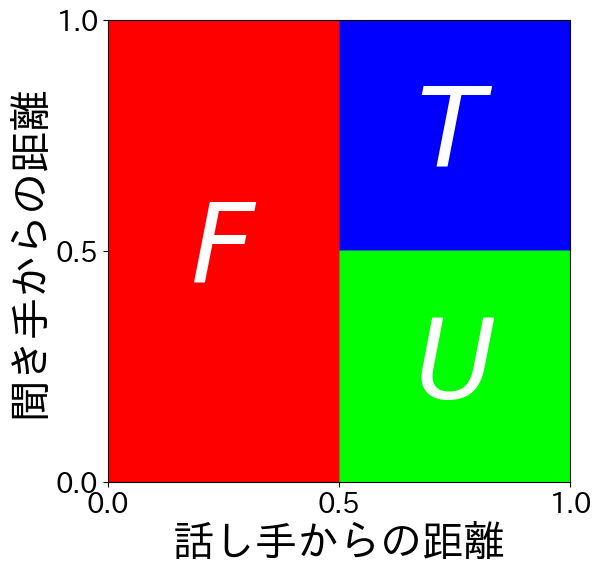

In [51]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create a grid for the square [0,1] x [0,1]
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)

# Initialize an RGB image
image = np.zeros((500, 500, 3))

# Define the colors based on the conditions
# Red region: x < 0.5
image[X < 0.5, 0] = 1  # Red channel

# Green region: 0.5 < x < 1 and y < 0.5
image[(X > 0.5) & (Y < 0.5), 1] = 1  # Green channel

# Blue region: 0.5 < x < 1 and 0.5 < y < 1
image[(X > 0.5) & (Y > 0.5), 2] = 1  # Blue channel

# Plot the modified image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, extent=[0, 1, 0, 1], origin="lower")

# Add white text to the center of each region
ax.text(0.25, 0.5, r"$F$", color="white", fontsize=80, ha="center", va="center")  # Red region center
ax.text(0.75, 0.25, r"$U$", color="white", fontsize=80, ha="center", va="center")  # Green region center
ax.text(0.75, 0.75, r"$T$", color="white", fontsize=80, ha="center", va="center")  # Blue region center

# Remove ticks and add labels
ax.set_xlabel("話し手からの距離", fontsize=30)
ax.set_ylabel("聞き手からの距離", fontsize=30)
ax.set_xticks([0,0.5,1])  # Remove x-axis ticks
ax.set_yticks([0,0.5,1])  # Remove y-axis ticks

# Change tick font size
ax.tick_params(axis="both", labelsize=20)

# Add arrows for x and y axes
ax.annotate("", xy=(1.05, 0), xytext=(-0.05, 0), arrowprops=dict(arrowstyle="->", color="black", lw=2))
ax.annotate("", xy=(0, 1.05), xytext=(0, -0.05), arrowprops=dict(arrowstyle="->", color="black", lw=2))

plt.show()

# 図5 距離場

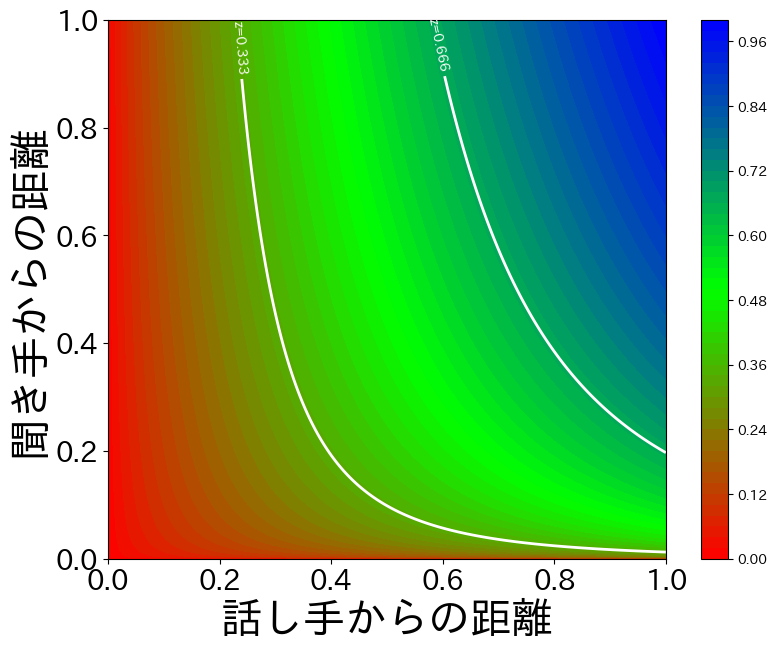

In [50]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the grid
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)

# Define the function z = sqrt(sqrt(x * y) * x)
Z = np.sqrt(np.sqrt(X * Y) * X)

# Define the custom colormap with specific RGB values
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # Red, Green, Blue
)

# Plot the contour with the adjusted custom colormap
plt.figure(figsize=(9, 7))
contour = plt.contourf(X, Y, Z, levels=50, cmap=custom_cmap)
plt.colorbar(contour)

# Add contour lines at z = 0.333 and z = 0.666 in white
contour_lines = plt.contour(X, Y, Z, levels=[0.333, 0.666], colors="white", linewidths=2)

# Add labels for the contour lines
plt.clabel(contour_lines, fmt="z=%.3f", colors="white", fontsize=10)

# Labels and title
plt.xlabel("話し手からの距離", fontsize=30)
plt.ylabel("聞き手からの距離", fontsize=30)

# Adjust tick font sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
